In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy.signal import convolve2d

# Experiment 1

In [2]:
cameraman = cv2.imread("cameraman.jpg",0)

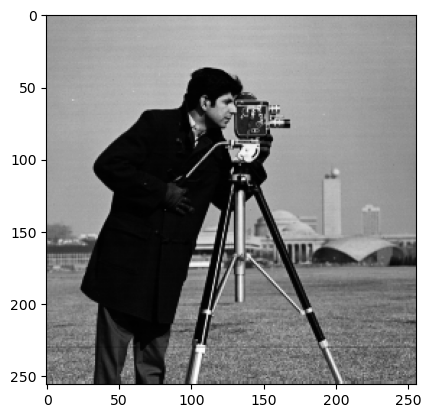

In [3]:
plt.imshow(cameraman,cmap='gray')

## Applying Fourier transform for cameraman image


In [4]:
# Apply Fourier Transform to the image
f = np.fft.fft2(cameraman)
fshift = np.fft.fftshift(f)
frequency_spectrum = np.log(np.abs(fshift))

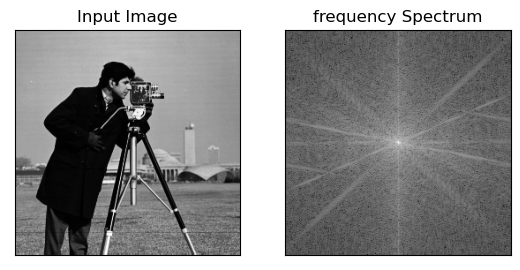

In [5]:
# Display the image in the frequency domain
plt.subplot(121),plt.imshow(cameraman, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(frequency_spectrum, cmap = 'gray')
plt.title('frequency Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## low pass filter

In [6]:
#low pass filter with a cutoff frequency of 20
rows, cols = cameraman.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow - 20: crow + 20, ccol - 20: ccol + 20] = 1

In [7]:
# Apply the low pass filter to the Fourier transform of the image
fshift_filtered = fshift * mask

# Compute the inverse Fourier transform to get the filtered image
f_filtered = np.fft.ifftshift(fshift_filtered)
img_filtered_lowpass = np.fft.ifft2(f_filtered)
img_filtered_lowpass = np.abs(img_filtered_lowpass)

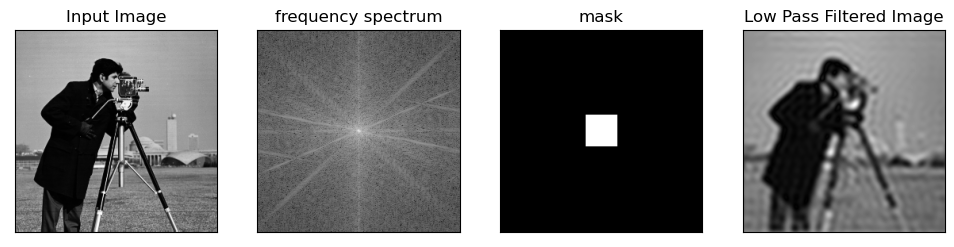

In [8]:
# Display the original image and the filtered images
plt.rcParams["figure.figsize"] = (12, 4)
plt.subplot(1, 4, 1), plt.imshow(cameraman, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 3), plt.imshow(mask, cmap='gray')
plt.title('mask'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4), plt.imshow(img_filtered_lowpass, cmap='gray')
plt.title('Low Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 2), plt.imshow(frequency_spectrum, cmap='gray')
plt.title('frequency spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## High pass filter

In [9]:
#high pass filter with a cutoff frequency of 20
mask2 = np.ones((rows, cols), np.uint8)
mask2[crow - 20: crow + 20, ccol - 20: ccol + 20] = 0


In [10]:
# Apply the high pass filter to the Fourier transform of the image
fshift_filtered2 = fshift * mask2

# Compute the inverse Fourier transform to get the filtered image
f_filtered2 = np.fft.ifftshift(fshift_filtered2)
img_filtered_highpass = np.fft.ifft2(f_filtered2)
img_filtered_highpass = np.abs(img_filtered_highpass)

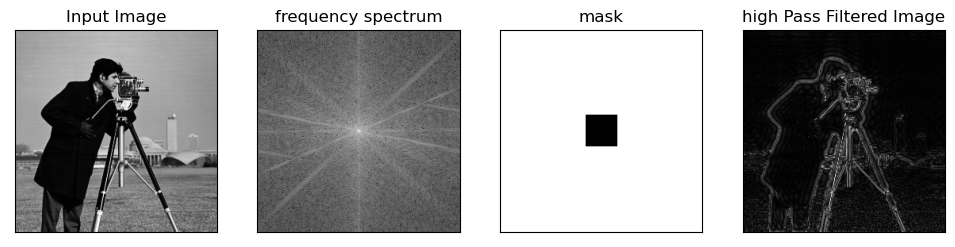

In [11]:
# Display the original image and the filtered images
plt.rcParams["figure.figsize"] = (12, 4)
plt.subplot(1, 4, 1), plt.imshow(cameraman, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 3), plt.imshow(mask2, cmap='gray')
plt.title('mask'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 4), plt.imshow(img_filtered_highpass, cmap='gray')
plt.title('high Pass Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 4, 2), plt.imshow(frequency_spectrum, cmap='gray')
plt.title('frequency spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


# Experiment 2

In [12]:
eight = cv2.imread("eight.jpg",0)

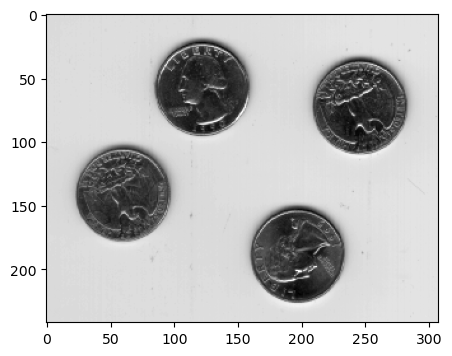

In [13]:
plt.imshow(eight,cmap='gray')

In [14]:
# Add Gaussian noise to the image
mean = 0
variance = 100
sigma = variance ** 0.5
gaussian_noise = np.random.normal(mean, sigma, eight.shape)
noisy_img = eight + gaussian_noise

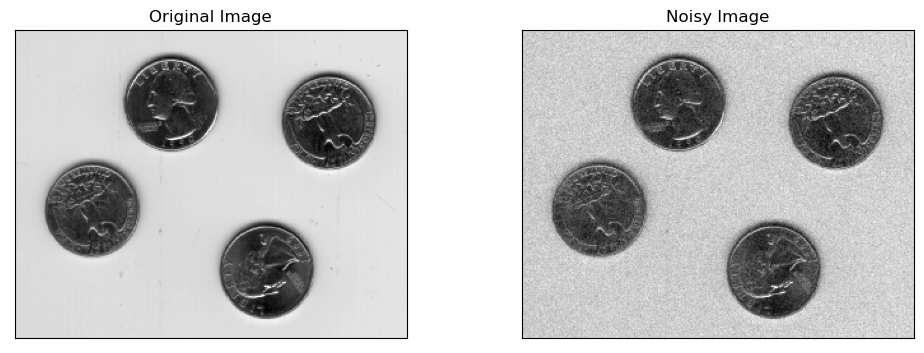

In [15]:
# Show the noisy image
plt.subplot(121),plt.imshow(eight,cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(noisy_img,cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

def adaptive_median_filter(image,window_size_max = 21):
    
    def pad_image(image):
        padding = 3
        padded_image = np.pad(image, padding, mode='constant')
        return padded_image
        
    def apply_level_a(image, x, y, window_size, window_size_max):
        window = image[x - (window_size // 2):x + (window_size // 2) + 1, y - (window_size // 2):y + (window_size // 2) + 1]

        z_min = np.min(window)
        z_med = np.median(window)
        z_max = np.max(window)

        a1 = z_med - z_min
        a2 = z_med - z_max

        if a1 > 0 and a2 < 0:
            return apply_level_b(window)
        else:
            window_size += 2
            if window_size <= window_size_max:
                return apply_level_a(image, x, y, window_size, window_size_max)
            else:
                return z_med


    def apply_level_b(window):
        window_height, window_width = window.shape
        z_min = np.min(window)
        z_med = np.median(window)
        z_max = np.max(window)

        z_xy = window[window_height // 2, window_width // 2]
        b1 = z_xy - z_min
        b2 = z_xy - z_max

        if b1 > 0 and b2 < 0:
            return z_xy
        else:
            return z_med

        
    window_radius = window_size_max // 2

    padded_image = pad_image(image)
    height, width = padded_image.shape
    filtered_image = np.zeros((height, width))

    for i in range(window_radius, height - 1):
        for j in range(window_radius, width - 1):
            filtered_image[i, j] = apply_level_a(padded_image, i, j, 3, window_size_max)

    return filtered_image[window_radius:-window_radius, window_radius:-window_radius]

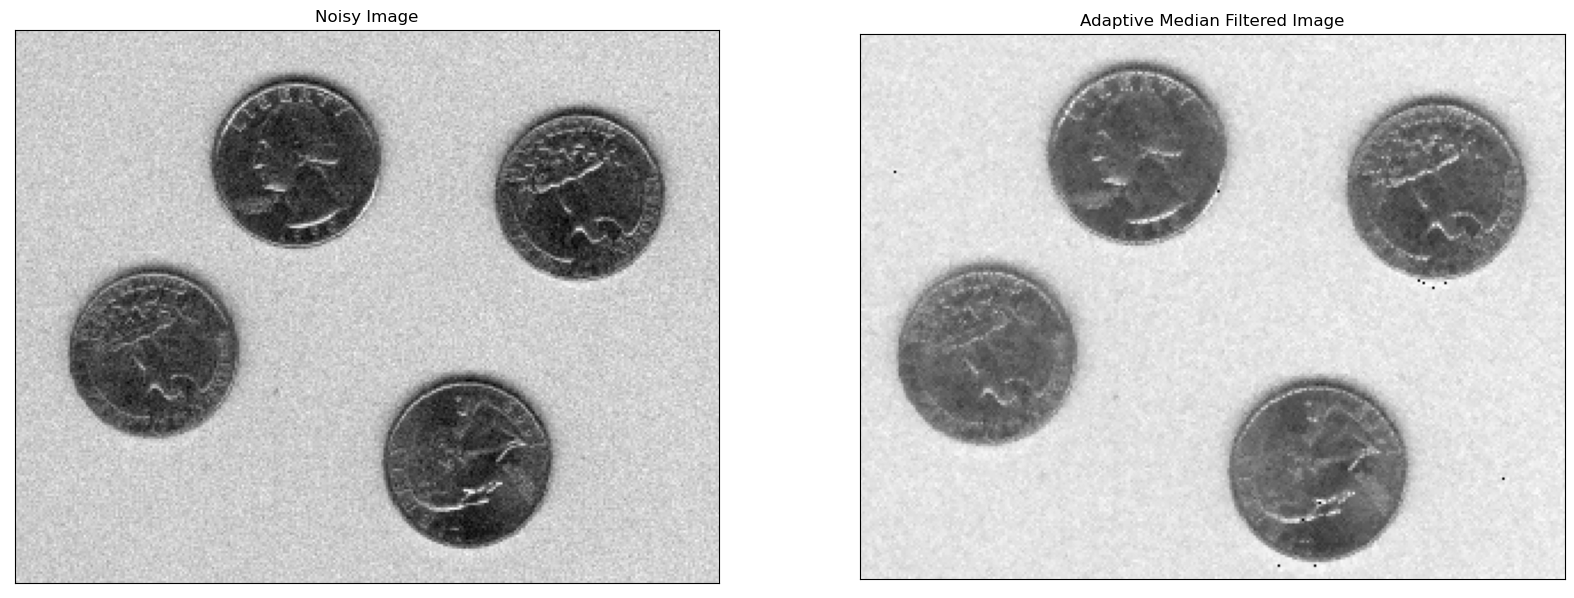

In [23]:
filtered_image = adaptive_median_filter(noisy_img,window_size_max = 22)

filtered_image = filtered_image.astype(np.uint8)
# Show the filtered image
plt.subplot(121), plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
plt.title('Adaptive Median Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Expirement 3

In [18]:
def s_p_noise(img,prob):

    noisy_img = img.copy()

    for i in range(noisy_img.shape[0]):
        for j in range(noisy_img.shape[1]):
            rand = np.random.rand()
            if rand < prob:
                noisy_img[i, j] = 0
            elif rand > 1 - prob:
                noisy_img[i, j] = 255
    return noisy_img

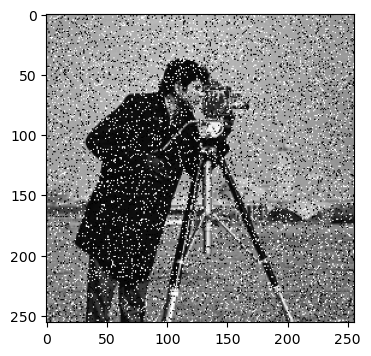

In [19]:
s_p_noisy_img = s_p_noise(cameraman,0.08)
plt.imshow(s_p_noisy_img,cmap='gray')

In [20]:
# Apply arithmetic mean filter
arithmetic_mean_filter = np.ones((5, 5)) / 25
img_mean = convolve2d(s_p_noisy_img, arithmetic_mean_filter)

# Apply median filter
median = cv2.medianBlur(s_p_noisy_img, 5) 

# Apply max filter
max_filter = cv2.dilate(s_p_noisy_img, np.ones((3,3), np.uint8))

# Apply min filter
min_filter = cv2.erode(s_p_noisy_img, np.ones((3,3), np.uint8))


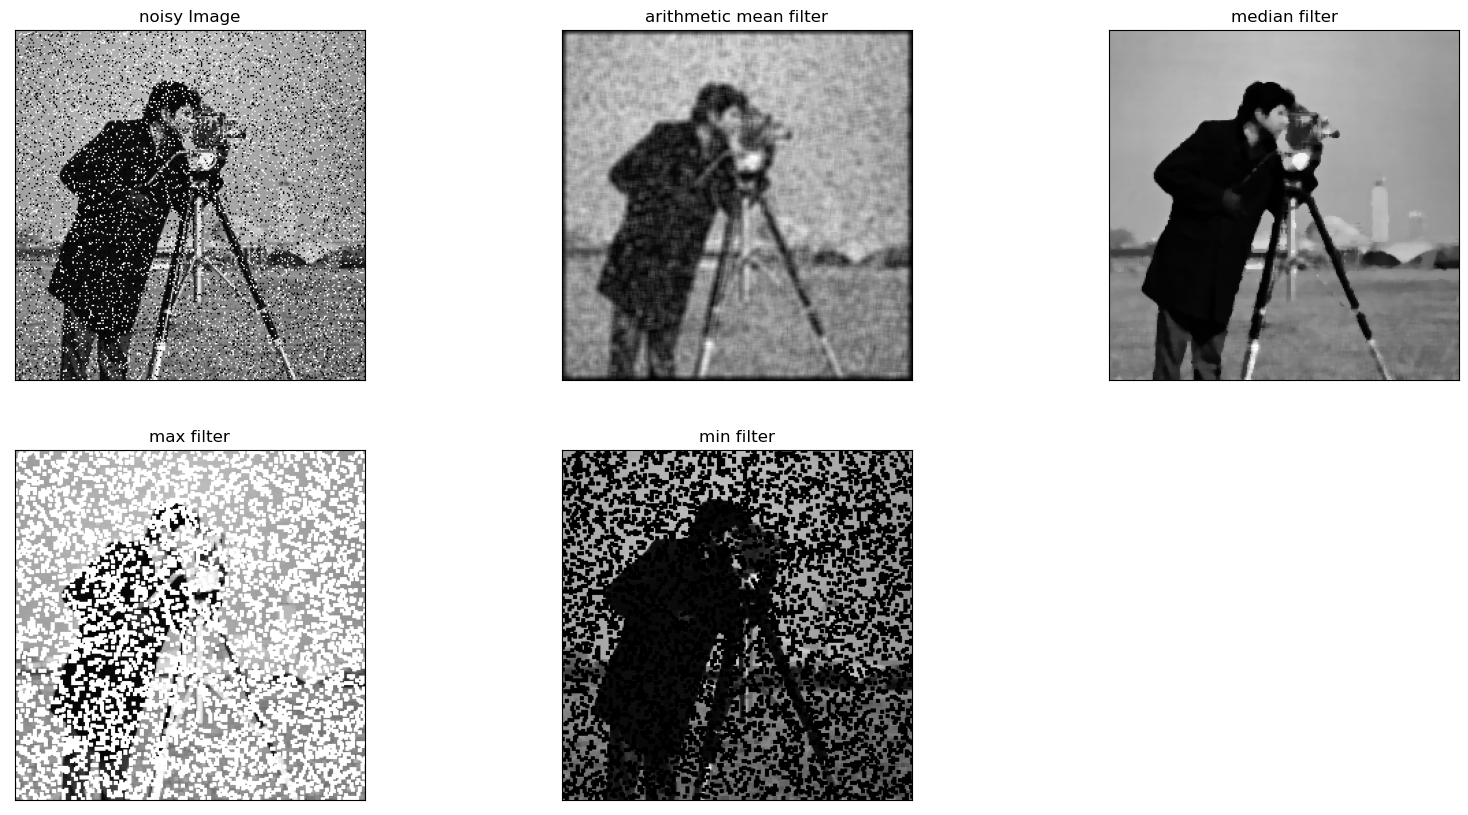

In [21]:

# Display the original image and the filtered images
plt.rcParams["figure.figsize"] = (20, 10)
plt.subplot(2, 3, 1), plt.imshow(s_p_noisy_img, cmap='gray')
plt.title('noisy Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 2), plt.imshow(img_mean, cmap='gray')
plt.title('arithmetic mean filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 3), plt.imshow(median, cmap='gray')
plt.title('median filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 4), plt.imshow(max_filter, cmap='gray')
plt.title('max filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 3, 5), plt.imshow(min_filter, cmap='gray')
plt.title('min filter'), plt.xticks([]), plt.yticks([])
plt.show()
